In [13]:
# run `include("./developer/revice.jl")`
using Pkg
Pkg.instantiate()
# Pkg.add("Revise")
using Revise
Pkg.activate("../")
using Antique
using Plots
using Printf
using QuadGK

Precompiling project...
  ✓ Antique
  1 dependency successfully precompiled in 2 seconds (18 already precompiled)
  1 dependency precompiled but a different version is currently loaded. Restart julia to access the new version
  Activating project at `~/Documents/6. Github/Ohno/Antique.jl-1`


### Delta function potential

In [3]:
DP = DeltaPotential(α=0.1,m=0.5, ℏ=0.1)

DeltaPotential(0.1, 0.5, 0.1)

In [4]:
E(DP)

-0.25

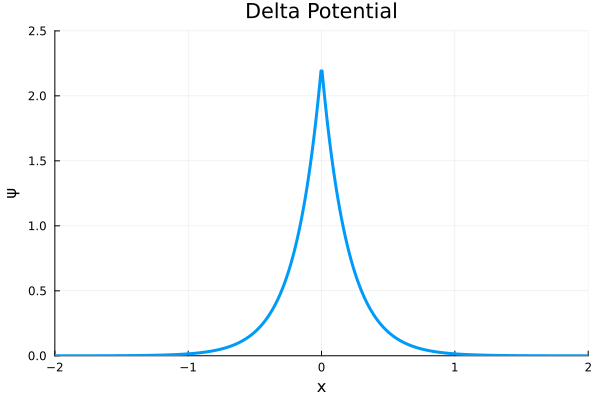

In [5]:
x = LinRange(-2,2,500);
ψδ = ψ(DP,x);

plot(x,ψδ,linewidth=3)
plot!(xlim=[-2,2],ylim=[0,2.5],legend=false)
plot!(xlabel="x",ylabel="ψ",title="Delta Potential")

In [6]:
using QuadGK
using Printf

[ Info: Precompiling QuadGK [1fd47b50-473d-5c70-9696-f719f8f3bcdc]


In [7]:
analytical = 1
numerical  = quadgk(x -> conj(ψ(DP, x)) * ψ(DP, x), -Inf, Inf, maxevals=10^3)[1]
acceptance = iszero(analytical) ? isapprox(analytical, numerical, atol=1e-5) : isapprox(analytical, numerical, rtol=1e-5)

true

In [8]:
@printf("%17.12f | %17.12f %s\n", analytical, numerical, acceptance ? "✔" : "✗")

   1.000000000000 |    1.000000000000 ✔


In [9]:
DP = DeltaPotential(α=0.1, m=0.5, ℏ=0.1)
x = LinRange(-2,2,500);

using Plots
plot(xlim=[-2,2], ylim=[-1,2.0], legend=false, xlabel="\$x\$", ylabel="\$V(x),~E,~\\psi(x)+E\$")
plot!([-2,0,0,0,2], [0,0,-1,0,0], lw=1, lc=:black) # plot!(x, x->V(DP,x), lw=1, lc=:black)
plot!(x, x->ψ(DP,x) + E(DP), lw=2, lc=1)
hline!([E(DP)], lw=1, ls=:dash, lc=:black)

`V(model::InfinitePotentialWell; x)`

$$
V(x) =
\left\{
  \begin{array}{ll}
  \infty & x \lt 0, L \lt x \\
  0      & 0 \leq x \leq L
  \end{array}
\right.
$$

---

`V(model::HarmonicOscillator, x)`

$$
V(x)
= \frac{1}{2} k x^2
= \frac{1}{2} m \omega^2 x^2
= \frac{1}{2} \hbar \omega \xi^2,
$$

where $\omega = \sqrt{k/m}$ is the angular frequency.

---

`V(model::MorsePotential, r)`

$$
V(r) = D_\mathrm{e} \left( \mathrm{e}^{-2a(r-r_e)} - 2\mathrm{e}^{-a(r-r_e)} \right),
$$

where $a = \sqrt{\frac{k}{2Dₑ}}$ is defined. The domain is $0\leq r \lt \infty$.

---

`V(model::HydrogenAtom, r)`

$$
\begin{aligned}
  V(r)
  &= - \frac{Ze^2}{4\pi\varepsilon_0 r} 
  &= - \frac{e^2}{4\pi\varepsilon_0 a_0} \frac{Z}{r/a_0}
  &= - \frac{Z}{r/a_0} E_\mathrm{h},
\end{aligned}
$$

The domain is $0\leq r \lt \infty$.

---

`V(model::DeltaPotential, x)`

$$
V(x) = -\alpha \delta(x).
$$

---

`V(model::PoschlTeller, x)`

$$
\begin{aligned}
  V(x)
  &= -\frac{\lambda(\lambda+1)}{2}  \mathrm{sech}(x)^2
  &= -\frac{\lambda(\lambda+1)}{2}  \frac{1}{\mathrm{cosh}(x)^2}.
\end{aligned}
$$


In [31]:
? E(::DeltaPotential)

`E(model::DeltaPotential)`

$$
E = - \frac{m\alpha^2}{2\hbar^2}
$$


In [32]:
? ψ(::DeltaPotential)

`ψ(model::InfinitePotentialWell, x; n=1)`

$$
\psi_n(x) = \sqrt{\frac{2}{L}} \sin \frac{n\pi x}{L}
$$

---

`ψ(model::HarmonicOscillator, x; n=0)`

$$
\psi_n(x) = A_n H_n(\xi) \exp{\left( -\frac{\xi^2}{2} \right)},
$$

where $\omega = \sqrt{k/m}$, $\xi = \sqrt{\frac{m\omega}{\hbar}}x$, $A_n = \sqrt{\frac{1}{n! 2^n} \sqrt{\frac{m\omega}{\pi\hbar}}}$, $H_n(x) = (-1)^n \mathrm{e}^{x^2} \frac{\mathrm{d}^n}{\mathrm{d}x^n} \mathrm{e}^{-x^2}$ are defined.

---

`ψ(model::MorsePotential, r; n=0)`

$$
\psi_n(r) = N_n z^{\lambda-n-1/2} \mathrm{e}^{-z/2} L_n^{(2\lambda-2n-1)}(\xi),
$$

$N_n = \sqrt{\frac{n!(2\lambda-2n-1)a}{\Gamma(2\lambda-n)}}$, $\lambda = \frac{\sqrt{2\mu D_\mathrm{e}}}{a\hbar}$, $a = \sqrt{\frac{k}{2Dₑ}}$, $L_n^{(\alpha)}(x) = \frac{x^{-\alpha} \mathrm{e}^x}{n !} \frac{\mathrm{d}^n}{\mathrm{d} x^n}\left(\mathrm{e}^{-x} x^{n+\alpha}\right)$, $\xi := 2\lambda\mathrm{e}^{-a(r-r_e)}$ are defined. The domain is $0\leq r \lt \infty$.

---

`ψ(model::HydrogenAtom, r, θ, φ; n=1, l=0, m=0)`

$$
\psi_{nlm}(\pmb{r}) = R_{nl}(r) Y_{lm}(\theta,\varphi)
$$

The domain is $0\leq r \lt \infty, 0\leq \theta \lt \pi, 0\leq \varphi \lt 2\pi$.

---

`ψ(model::DeltaPotential, x)`

$$
\psi(x) = \frac{\sqrt{m\alpha}}{\hbar} \mathrm{e}^{-m\alpha |x|/\hbar^2}
$$

---

`ψ(model::PoschlTeller, x; n=0)`

$$
\psi_n(x) = P_\lambda^{\mu}(\mathrm{tanh}(x)) \sqrt{\mu\frac{\Gamma(\lambda-\mu+1)}{\Gamma(\lambda+\mu+1)}},
$$

where $\mu = \mu(n) = n_\mathrm{max}-n+1$, and $n_\mathrm{max} = \left\lfloor \lambda \right\rfloor - 1$ and $P_\lambda^{\mu}$ are the associated Legendre functions.

---

`ψ(model::HarmonicOscillator3D, r, θ, φ; n=1, l=0, m=0)`

$$
\psi_{nlm}(\pmb{r}) = R_{nl}(r) Y_{lm}(\theta,\varphi)
$$

The domain is $0\leq r \lt \infty, 0\leq \theta \lt \pi, 0\leq \varphi \lt 2\pi$.


In [57]:
? DeltaPotential

search: DeltaPotential



`DeltaPotential(α=1.0, m=1.0, ℏ=1.0)`

$\alpha$ is the potential strength, $m$ is the mass of particle and $\hbar$ is the reduced Planck constant (Dirac's constant).


### 3D Harmonic Oscillator potential

In [63]:
HO3D = HarmonicOscillator3D(k=1,m=1, ℏ=1)

HarmonicOscillator3D(1, 1, 1)

In [67]:
E(HO3D;n=1)

2.5

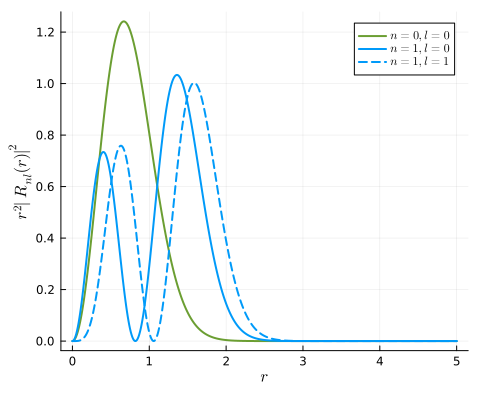

In [ ]:
using Plots
plot(xlabel="\$r\$", ylabel="\$r^2|R_{nl}(r)|^2\$", xticks=0:1:20, size=(480,400), dpi=300)
for n in 0:1
  for l in 0:n
    plot!(0:0.01:5, r->r^2*R(HO3D,r,n=n,l=l)^2, lc=n, lw=2, ls=[:solid,:dash,:dot,:dashdot,:dashdotdot][l+1], label="\$n = $n, l=$l\$")
  end
end
plot!()

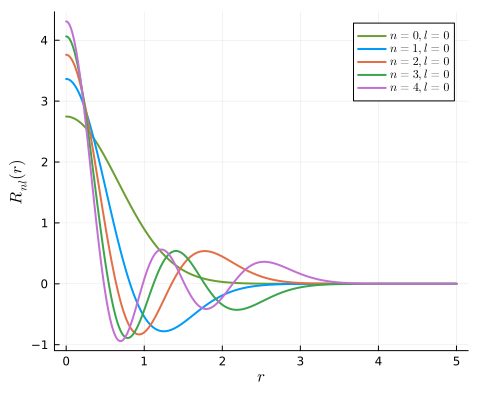

In [ ]:
using Plots
plot(xlabel="\$r\$", ylabel="\$R_{nl}(r)\$", xticks=0:1:20, size=(480,400), dpi=300)
for n in 0:4
  for l in 0
    plot!(0:0.01:5, r->R(HO3D,r,n=n,l=l), lc=n, lw=2, ls=[:solid,:dash,:dot,:dashdot,:dashdotdot][l+1], label="\$n = $n, l=$l\$")
  end
end
plot!()

In [56]:
for n in 0:5
    for l in 0:n
      analytical = 1
      numerical  = quadgk(r -> r^2 * R(HO3D,r,n=n,l=l)^2, 0, Inf, maxevals=10^3)[1]
      acceptance = iszero(analytical) ? isapprox(analytical, numerical, atol=1e-5) : isapprox(analytical, numerical, rtol=1e-5)
      @printf("%2d | %2d | %17.12f | %17.12f %s\n", n, l, analytical, numerical, acceptance ? "✔" : "✗")
    end
end

 0 |  0 |    1.000000000000 |    1.000000000000 ✔
 1 |  0 |    1.000000000000 |    1.000000000000 ✔
 1 |  1 |    1.000000000000 |    1.000000000000 ✔
 2 |  0 |    1.000000000000 |    1.000000000000 ✔
 2 |  1 |    1.000000000000 |    1.000000000000 ✔
 2 |  2 |    1.000000000000 |    1.000000000000 ✔
 3 |  0 |    1.000000000000 |    1.000000000000 ✔
 3 |  1 |    1.000000000000 |    1.000000000000 ✔
 3 |  2 |    1.000000000000 |    1.000000000000 ✔
 3 |  3 |    1.000000000000 |    1.000000000000 ✔
 4 |  0 |    1.000000000000 |    1.000000000000 ✔
 4 |  1 |    1.000000000000 |    1.000000000000 ✔
 4 |  2 |    1.000000000000 |    1.000000000000 ✔
 4 |  3 |    1.000000000000 |    1.000000000000 ✔
 4 |  4 |    1.000000000000 |    1.000000000000 ✔
 5 |  0 |    1.000000000000 |    1.000000000000 ✔
 5 |  1 |    1.000000000000 |    1.000000000000 ✔
 5 |  2 |    1.000000000000 |    1.000000000000 ✔
 5 |  3 |    1.000000000000 |    1.000000000000 ✔
 5 |  4 |    1.000000000000 |    1.000000000000 ✔


In [55]:
for n1 in 0:1
for n2 in 0:1
for l1 in 0:n1
for l2 in 0:n2
for m1 in -l1:l1
for m2 in -l2:l2
    analytical = (n1 == n2 ? 1 : 0) * (l1 == l2 ? 1 : 0) * (m1 == m2 ? 1 : 0)
    numerical = real(
    quadgk(phi ->
    quadgk(theta ->
    quadgk(r ->
        r^2 * sin(theta) * conj(ψ(HO3D,r,theta,phi,n=n1,l=l1,m=m1)) * ψ(HO3D,r,theta,phi,n=n2,l=l2,m=m2)
    , 0, Inf, maxevals=50)[1]
    , 0, π, maxevals=4)[1]
    , 0, 2π, maxevals=8)[1]
    )
    acceptance = iszero(analytical) ? isapprox(analytical, numerical, atol=1e-2) : isapprox(analytical, numerical, rtol=1e-2)
    @printf("%2d | %2d | %2d | %2d | %2d | %2d | %17.12f | %17.12f %s\n", n1, n2, l1, l2, m1, m2, analytical, numerical, acceptance ? "✔" : "✗")
end
end
end
end
end
end


 0 |  0 |  0 |  0 |  0 |  0 |    1.000000000000 |    1.000000000000 ✔
 0 |  1 |  0 |  0 |  0 |  0 |    0.000000000000 |    0.000000000001 ✔
 0 |  1 |  0 |  1 |  0 | -1 |    0.000000000000 |   -0.000000000000 ✔
 0 |  1 |  0 |  1 |  0 |  0 |    0.000000000000 |   -0.000000000000 ✔
 0 |  1 |  0 |  1 |  0 |  1 |    0.000000000000 |    0.000000000000 ✔
 1 |  0 |  0 |  0 |  0 |  0 |    0.000000000000 |    0.000000000001 ✔
 1 |  0 |  1 |  0 | -1 |  0 |    0.000000000000 |    0.000000000000 ✔
 1 |  0 |  1 |  0 |  0 |  0 |    0.000000000000 |   -0.000000000000 ✔
 1 |  0 |  1 |  0 |  1 |  0 |    0.000000000000 |   -0.000000000000 ✔
 1 |  1 |  0 |  0 |  0 |  0 |    1.000000000000 |    0.999999999998 ✔
 1 |  1 |  0 |  1 |  0 | -1 |    0.000000000000 |    0.000000000000 ✔
 1 |  1 |  0 |  1 |  0 |  0 |    0.000000000000 |   -0.000000000000 ✔
 1 |  1 |  0 |  1 |  0 |  1 |    0.000000000000 |    0.000000000000 ✔
 1 |  1 |  1 |  0 | -1 |  0 |    0.000000000000 |   -0.000000000000 ✔
 1 |  1 |  1 |  0 | 

In [49]:
numerical = real(
    quadgk(phi ->
    quadgk(theta ->
    quadgk(r ->
        r^2 * sin(theta) * conj(ψ(HO3D,r,theta,phi,n=0,l=0,m=0)) * ψ(HO3D,r,theta,phi,n=0,l=0,m=0)
    , 0, Inf, maxevals=50)[1]
    , 0, π, maxevals=4)[1]
    , 0, 2π, maxevals=8)[1]
    )

1.0000000000000822

In [52]:
numerical = real(
    quadgk(phi ->
    quadgk(theta ->
    quadgk(r ->
        r^2 * sin(theta) * conj(ψ(HO3D,r,theta,phi,n=1,l=0,m=0)) * ψ(HO3D,r,theta,phi,n=0,l=0,m=0)
    , 0, Inf, maxevals=50)[1]
    , 0, π, maxevals=4)[1]
    , 0, 2π, maxevals=8)[1]
)
    

1.3754679477151373e-12

In [69]:

    println(" n |  l |        analytical |         numerical ")
    println("-- | -- | ----------------- | ----------------- ")
    for n in 0:5
    for l in 0:n
      analytical = 1
      numerical  = quadgk(r -> r^2 * R(HO3D,r,n=n,l=l)^2, 0, Inf, maxevals=10^3)[1]
      acceptance = iszero(analytical) ? isapprox(analytical, numerical, atol=1e-5) : isapprox(analytical, numerical, rtol=1e-5)
      @printf("%2d | %2d | %17.12f | %17.12f %s\n", n, l, analytical, numerical, acceptance ? "✔" : "✗")
    end
    end

 n |  l |        analytical |         numerical 
-- | -- | ----------------- | ----------------- 
 0 |  0 |    1.000000000000 |    1.000000000000 ✔
 1 |  0 |    1.000000000000 |    1.000000000000 ✔
 1 |  1 |    1.000000000000 |    1.000000000000 ✔
 2 |  0 |    1.000000000000 |    1.000000000000 ✔
 2 |  1 |    1.000000000000 |    1.000000000000 ✔
 2 |  2 |    1.000000000000 |    1.000000000000 ✔
 3 |  0 |    1.000000000000 |    1.000000000000 ✔
 3 |  1 |    1.000000000000 |    1.000000000000 ✔
 3 |  2 |    1.000000000000 |    1.000000000000 ✔
 3 |  3 |    1.000000000000 |    1.000000000000 ✔
 4 |  0 |    1.000000000000 |    1.000000000000 ✔
 4 |  1 |    1.000000000000 |    1.000000000000 ✔
 4 |  2 |    1.000000000000 |    1.000000000000 ✔
 4 |  3 |    1.000000000000 |    1.000000000000 ✔
 4 |  4 |    1.000000000000 |    1.000000000000 ✔
 5 |  0 |    1.000000000000 |    1.000000000000 ✔
 5 |  1 |    1.000000000000 |    1.000000000000 ✔
 5 |  2 |    1.000000000000 |    1.000000000000 ✔
 5

In [ ]:
E(DP)

-0.25

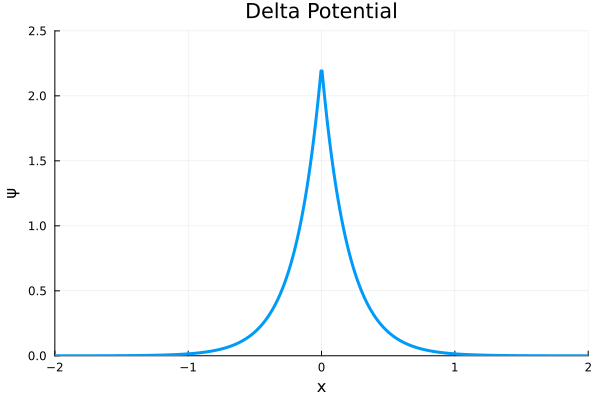

In [ ]:
x = LinRange(-2,2,500);
ψδ = ψ(DP,x);

plot(x,ψδ,linewidth=3)
plot!(xlim=[-2,2],ylim=[0,2.5],legend=false)
plot!(xlabel="x",ylabel="ψ",title="Delta Potential")